## Observations and Insights 

<h1>Observations From Data</h1>
<p>
Looking at the bar graph, drug treatment count, and box plots, we see that both Capomulin and Ramicane share similar results. That is, they both have approx. the same number of treatments (230 & 228) and both yield close IQRs with similar means. Similarly, Infobino and Ceftamin were administered 178 time throughout the study and yield close IQRs with similar means. 

    
In the case of Capomulin Mouse S185, we notice that as the study went on and treatment was administered throughout each time point, the mouse’s tumor volume decreases. The line graphs shows that the treat was successful in reducing the size of the tumor. 

    
Finally, from our analysis of average mouse weight and average tumor weight we can conclude that there is a strong positive correlation. That is, the heavier the mouse, the larger the tumor (in volume). This is backed up by a strong rvalue of .70. Our linear regression also allows us to make comfortable estimates of tumor volume with respect of mouse weight. 

</p>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge( mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check new df for any null data and for column info
mouse_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
mouse_data_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# getting rid of duplicates 
#mouse_data_clean_df = mouse_data_df[mouse_data_df['Mouse ID'] != 'g989']
mouse_data_clean_df = mouse_data_df.drop(mouse_data_df.index [[909, 911, 913, 915, 917]])

In [6]:
mouse_data_clean_df.shape

(1888, 8)

In [7]:
# run duplicate function to check for anymore duplicates from new data
mouse_data_clean_df[mouse_data_clean_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean_df['Mouse ID'].nunique()

249

In [9]:
# final df for clean data
mouse_data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_drug_reg = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'std', 'sem']).reset_index()


In [11]:
# Clean new df
summary_drug_reg = summary_drug_reg.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']]

In [12]:
summary_drug_reg.reset_index(drop = True)
summary_drug_reg

Drug Regimen Tumor Volume (mm3)                               
                             mean     median       std       sem
0    Capomulin          40.675741  41.557809  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  6.268188  0.469821
2    Infubinol          52.884795  51.820584  6.567243  0.492236
3     Ketapril          55.235638  53.698743  8.279709  0.603860
4     Naftisol          54.331565  52.509285  8.134708  0.596466
5      Placebo          54.033581  52.288934  7.821003  0.581331
6     Propriva          52.393463  50.909965  6.568014  0.525862
7     Ramicane          40.216745  40.673236  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

In [13]:
# Create a new df for drug regimen and number of times used throughout the study
drug_reg_count = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['count']).reset_index()
drug_reg_count = drug_reg_count.loc[:, ["Drug Regimen", "Mouse ID"]]


In [14]:
drug_reg_count = drug_reg_count.rename(columns = {"Mouse ID": "Used_Throughout"})
drug_reg_count.columns = drug_reg_count.columns.droplevel(1)
drug_reg_count.head()

,Drug Regimen,Used_Throughout
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


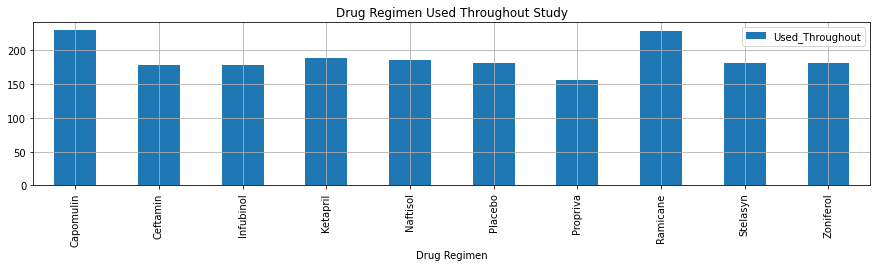

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg_count.plot(kind="bar", x="Drug Regimen", y="Used_Throughout", figsize=(15, 3), grid = True, title="Drug Regimen Used Throughout Study")

plt.show()

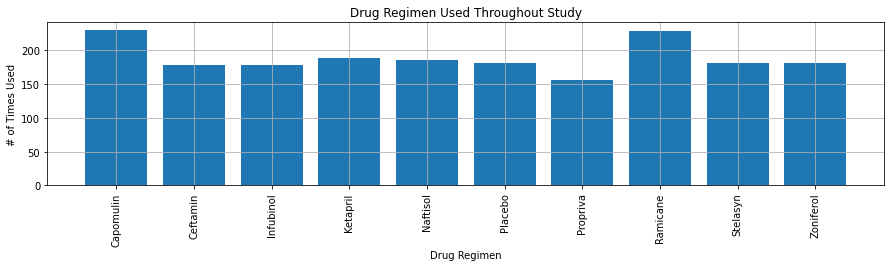

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize = (15, 3))
plt.bar(drug_reg_count['Drug Regimen'], drug_reg_count['Used_Throughout'])
plt.xticks(rotation = 90)
plt.title("Drug Regimen Used Throughout Study")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Times Used")
plt.grid()
plt.show()


In [17]:
# Generate a df to use in the creation of pie graphs
male_female_df = mouse_data_clean_df.groupby(["Sex"]).agg(['count']).reset_index()
male_female_df = male_female_df.loc[:, ["Sex", "Mouse ID"]]

In [18]:
# Renaming columns and dropping the level index name
male_female_df = male_female_df.rename(columns = {"Mouse ID": "Count"})
male_female_df.columns = male_female_df.columns.droplevel(1)
male_female_df.head()

,Sex,Count
0,Female,930
1,Male,958


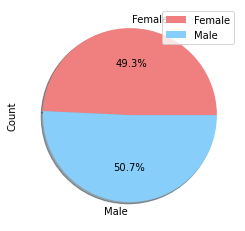

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_df.plot(kind = "pie", y="Count", autopct='%1.1f%%', shadow = True, colors = ["lightcoral", "lightskyblue"], labels=["Female", "Male"])
plt.show()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female Mice", "Male Mice"]
colors = ["lightcoral", "lightskyblue"]



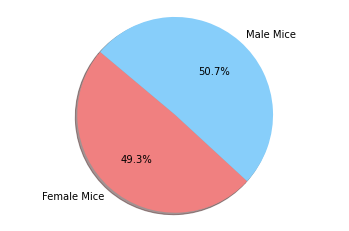

In [21]:
# create pie chart with the above variables
plt.pie(male_female_df['Count'], labels= labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# OG Data
mouse_data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# create df for our four drug regimens of interest
capomulin_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Ceftamin"]
four_drug_df = pd.concat([capomulin_df, ramicane_df, infubinol_df, ceftamin_df]).reset_index(drop = True)
four_drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0


In [24]:
# Group by max to find last timepoint
drug_final_timepoint_df = four_drug_df.groupby(['Mouse ID', 'Drug Regimen']).Timepoint.agg(['max']).reset_index()

drug_final_timepoint_df = drug_final_timepoint_df.rename(columns={"max": "Timepoint"})
drug_final_timepoint_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a275,Ceftamin,45
3,a411,Ramicane,45
4,a444,Ramicane,45
...,...,...,...
95,y769,Ceftamin,45
96,y793,Capomulin,45
97,y865,Ceftamin,45
98,z578,Ramicane,45


In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
overall_final_timepoint = drug_final_timepoint_df.merge(mouse_data_clean_df, how='left', on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
overall_final_timepoint.head()

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0


In [26]:
# Put treatments into a individual dfs
capomulin_tumor_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Capomulin"]
capomulin_tumor_vol = capomulin_tumor_df["Tumor Volume (mm3)"]

ramicane_tumor_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Ramicane"]
ramicane_tumor_vol = ramicane_tumor_df["Tumor Volume (mm3)"]

infubinol_tumor_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Infubinol"]
infubinol_tumor_vol = infubinol_tumor_df["Tumor Volume (mm3)"]

ceftamin_tumor_df = mouse_data_clean_df.loc[mouse_data_clean_df["Drug Regimen"] == "Ceftamin"]
ceftamin_tumor_vol = ceftamin_tumor_df["Tumor Volume (mm3)"]
    

In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs = ["Capomuling", "Ramicane", "Infubinol", "Ceftamin"]
drug_volume_data_list = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
drug_volume_df_list = [capomulin_tumor_df, ramicane_tumor_df, infubinol_tumor_df, ceftamin_tumor_df]
outlier_df = pd.DataFrame(columns = ["Mouse ID"])

count = 0
for drug in drugs:
    test_drug = drug_volume_data_list[count]
    drug_df = drug_volume_df_list[count]
    quartiles = test_drug.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 2)
    upperq = round(quartiles[0.75], 2)
    iqr = round(upperq-lowerq, 2)

    print("------------------------------------------------------------------------")
    print(f"For tumor volume of {drug}, the lower quartile is: {lowerq} and the upper quartile is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}, and its median is {round(quartiles[0.5], 2)}")

    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    print(f"{drug} volume values below {lower_bound} and above {upper_bound} could be outliers.")
    print("------------------------------------------------------------------------")
    

    # Determine outliers using upper and lower bounds
    upper_bound_data = drug_df.loc[drug_df["Tumor Volume (mm3)"]>= upper_bound, :]
    lower_bound_data = drug_df.loc[drug_df["Tumor Volume (mm3)"]<= lower_bound, :]
    outlier_bounds = pd.concat([upper_bound_data, lower_bound_data])
    outlier_df = outlier_df.append(outlier_bounds, ignore_index = True)
    count += 1
    
# Pring out Outlier Table
outlier_df.head()

------------------------------------------------------------------------
For tumor volume of Capomuling, the lower quartile is: 37.69 and the upper quartile is: 45.0
The interquartile range of tumor volume is: 7.31, and its median is 41.56
Capomuling volume values below 26.72 and above 55.96 could be outliers.
------------------------------------------------------------------------
------------------------------------------------------------------------
For tumor volume of Ramicane, the lower quartile is: 36.67 and the upper quartile is: 45.0
The interquartile range of tumor volume is: 8.33, and its median is 40.67
Ramicane volume values below 24.18 and above 57.5 could be outliers.
------------------------------------------------------------------------
------------------------------------------------------------------------
For tumor volume of Infubinol, the lower quartile is: 47.31 and the upper quartile is: 57.31
The interquartile range of tumor volume is: 10.0, and its median is 5

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3.0,17.0,40.0,25.472143,1.0
1,s185,Capomulin,Female,3.0,17.0,45.0,23.343598,1.0
2,k403,Ramicane,Male,21.0,16.0,45.0,22.050126,1.0


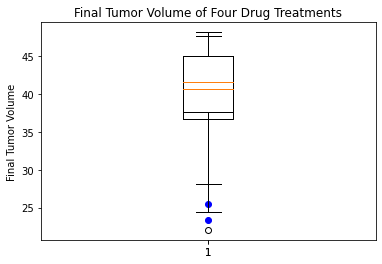

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#plt.boxplot(tumor_vol_data)
plt.boxplot(capomulin_tumor_vol, sym = "b")
plt.boxplot(ramicane_tumor_vol)
#plt.boxplot(infubinol_tumor_vol)
#plt.boxplot(ceftamin_tumor_vol)
plt.title("Final Tumor Volume of Four Drug Treatments")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = mouse_data_clean_df.loc[mouse_data_clean_df['Drug Regimen']=='Capomulin', :].reset_index(drop= True)
capomulin_mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


In [30]:
mouse_s185_df = capomulin_mouse_df.loc[capomulin_mouse_df['Mouse ID']=='s185', :]
mouse_s185_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


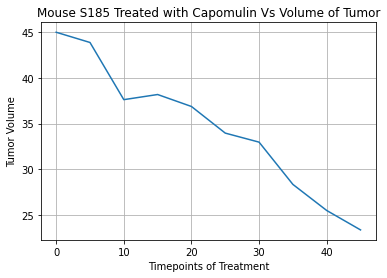

In [31]:
plt.plot(mouse_s185_df['Timepoint'], mouse_s185_df['Tumor Volume (mm3)'])
plt.title("Mouse S185 Treated with Capomulin Vs Volume of Tumor")
plt.xlabel("Timepoints of Treatment")
plt.ylabel("Tumor Volume")
plt.grid()
plt.show()

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# First create a new df reflecting data
mouse_weight_tumor_vol = capomulin_mouse_df.groupby('Mouse ID').mean().reset_index()
mouse_weight_tumor_vol.head()

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,9.0,22.0,22.5,41.963636,0.7
1,b742,7.0,21.0,22.5,40.083699,0.0
2,f966,16.0,17.0,10.0,36.505973,0.0
3,g288,3.0,19.0,22.5,41.990097,0.8
4,g316,22.0,22.0,22.5,44.613344,1.0


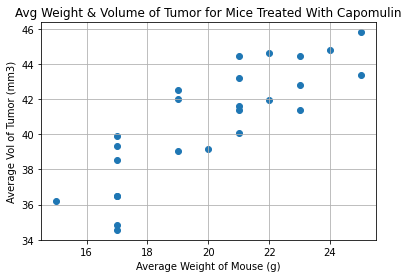

In [33]:
# Crafting Scatter plot for Avg weight of mouse vs Avg volume of tumor
x_values = mouse_weight_tumor_vol["Weight (g)"]
y_values = mouse_weight_tumor_vol["Tumor Volume (mm3)"]
plt.title("Avg Weight & Volume of Tumor for Mice Treated With Capomulin")
plt.scatter(x_values,y_values)
plt.xlabel('Average Weight of Mouse (g)')
plt.ylabel('Average Vol of Tumor (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

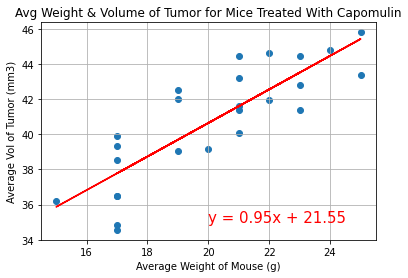

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight_tumor_vol["Weight (g)"]
y_values = mouse_weight_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Avg Weight & Volume of Tumor for Mice Treated With Capomulin")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Average Weight of Mouse (g)')
plt.ylabel('Average Vol of Tumor (mm3)')
plt.grid()
plt.show()

In [35]:
print(rvalue**2)

0.7088568047708717


In [36]:
# Strong correlation!